# Analyzing hate crimes trends for Austin, 2017 - Present

## Data Wrangling & Cleaning

I've been working on this project since about January 2020. One-half keeping my programming skills sharp, one-half because I want contribute to making sense of the chaos that is our world right now. What I intend is to analyze hate crimes trends for Austin, TX against the USA as a whole from 2017 to the present, with particular focus on the LGBT Community. 

I am using data provided by Austin PD in this notebook, and in the next 2, or 3 notebooks as well. For now, I am focusing solely on data for Austin. I will get into broader data for the USA later down the road.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Loading and examining the 2017 hate crimes dataset
aus_17 = pd.read_csv('https://data.austintexas.gov/resource/79qh-wdpx.csv')
display(aus_17.head())
print('----------------------------------')
display(aus_17.dtypes)

,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,bias,victim_type
0,January,2017-241137,01/01/2017/Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,Individual
1,February,2017-580344,02/01/2017/Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,March,2017-800291,03/21/2017/Tues,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Other
3,April,2017-1021534,04/12/2017/Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,Individual
4,May,2017-1351550,05/15/2017/Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),Individual


----------------------------------


month                           object
incident_number                 object
date_of_incident_day_of_week    object
number_of_vitims_under_18        int64
number_of_victims_over_18        int64
number_of_offenders_under_18     int64
number_of_offenders_over_18      int64
race_or_ethnic_of_offender      object
offense                         object
offense_location                object
bias                            object
victim_type                     object
dtype: object

I dislike the Socrata method of importing data because every column in a dataset imports as an object...importing the data using the url method leaves the column data intact so will make my job much easier down the road. 

### First glance...
As I stated previously, my goal is to analyze trends over time. In particular, I want to focus on how hate crime affects the LGBT community. Initially speaking, most of these columns will be unnecessary for my purposes so I suspect we'll be removing most of them. 

In [3]:
# Loading the datasets for '18, '19, and 2020
aus_18 = pd.read_csv('https://data.austintexas.gov/resource/idj2-d9th.csv')
aus_19 = pd.read_csv('https://data.austintexas.gov/resource/e3qf-htd9.csv')
aus_20 = pd.read_csv('https://data.austintexas.gov/resource/vc9m-ha4y.csv')

In [4]:
# Concatenating the datasets
aus_final = pd.concat([aus_17, aus_18, aus_19, aus_20], sort=False, axis=0)

# Examining the new dataset
display(aus_final.head())
print('----------------------------------')
display(aus_final.tail())
print('----------------------------------')
display(aus_final.isnull().sum())

,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,...,victim_type,race_ethnic_of_offender_s,offense_s,date_of_incident,day_of_week,number_of_victims_under_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,notes
0,January,2017-241137,01/01/2017/Sun,0.0,1,0.0,1.0,White/Not Hispanic,Aggravated Assault,Park/Playground,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,February,2017-580344,02/01/2017/Wed,0.0,1,0.0,1.0,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,March,2017-800291,03/21/2017/Tues,0.0,0,0.0,0.0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April,2017-1021534,04/12/2017/Wed,0.0,0,0.0,0.0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May,2017-1351550,05/15/2017/Mon,1.0,0,1.0,2.0,White/Not Hispanic,Simple Assault,Residence/Home,...,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,month,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,...,victim_type,race_ethnic_of_offender_s,offense_s,date_of_incident,day_of_week,number_of_victims_under_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,notes
2,March,2020-5011788,NaN,NaN,1,NaN,NaN,NaN,NaN,Residence/Home,...,NaN,NaN,Criminal Mischief,2020-03-22T00:00:00.000,Sunday,0.0,0.0,0.0,Unknown,NaN
3,April,2020-5015689,NaN,NaN,1,NaN,NaN,NaN,NaN,Church/Synagogue/Temple/Mosque,...,NaN,NaN,Criminal Mischief,2020-04-20T00:00:00.000,Monday,0.0,0.0,0.0,Unknown,NaN
4,April,2020-5016804,NaN,NaN,1,NaN,NaN,NaN,NaN,Department/Discount Store,...,NaN,NaN,Assault by Threat,2020-04-29T00:00:00.000,Wednesday,0.0,0.0,1.0,Black/Non-Hispanic,NaN
5,May,2020-1381131,NaN,NaN,1,NaN,NaN,NaN,NaN,Convenience Store,...,NaN,NaN,Assault by Contact,2020-05-17T00:00:00.000,Sunday,0.0,0.0,1.0,White/Non-Hispanic,NaN
6,May,2020-1410411,NaN,NaN,1,NaN,NaN,NaN,NaN,Streets/Highway/Road/Alley,...,NaN,NaN,Assault with Injury,2020-05-20T00:00:00.000,Wednesday,0.0,0.0,1.0,White/Non-Hispanic,NaN


----------------------------------


month                            0
incident_number                  0
date_of_incident_day_of_week    19
number_of_vitims_under_18       19
number_of_victims_over_18        0
number_of_offenders_under_18    19
number_of_offenders_over_18     19
race_or_ethnic_of_offender      38
offense                         38
offense_location                 0
bias                             0
victim_type                     19
race_ethnic_of_offender_s       36
offense_s                       17
date_of_incident                36
day_of_week                     36
number_of_victims_under_18      36
number_of_offenders_under       36
number_of_offenders_over        36
race_ethnicity_of_offenders     36
notes                           53
dtype: int64

1. The 'incident_number' column can be split along the '-' -- we can name a new 'year' column and convert it into datetime, and we can create a new 'incident_number' column. 
2. There are various descriptions in the 'bias' column that can be categorized into one variable as 'anti-lgbt.' Let's see what we can do with these. 
3. Also, we can convert the 'bias' column into a category type.

What I want to do now is split the 'incident_number' column along the '-' because the #s before the '-' clearly indicate the year the incident takes place, which I want to merge with the corresponding months in the 'month' column, and keep the numbers after the '-' as the 'incident_number.' 

Anti-Gay (Male)                      10
Anti-Black or African American       10
Anti-Black                            8
Anti-White                            3
Anti-Jewish                           3
Anti-Hispanic                         3
Anti-Hispanic or Latino               3
Anti-Islamic (Muslim)                 2
Anti-Gay                              2
Anti-Transgender                      2
Anti-Gay (Male); Anti-Transgender     2
Anti-Disability                       1
Anti-Lesbian                          1
Anti-Islamic(Muslim)                  1
Anti-Buddhist                         1
Anti-Gay (Male); Anti-Jewish          1
Anti-Hispanic/Latino                  1
Anti-Arab                             1
Name: bias, dtype: int64

----------------------------------


Anti-Gay (Male)                      0.181818
Anti-Black or African American       0.181818
Anti-Black                           0.145455
Anti-White                           0.054545
Anti-Jewish                          0.054545
Anti-Hispanic                        0.054545
Anti-Hispanic or Latino              0.054545
Anti-Islamic (Muslim)                0.036364
Anti-Gay                             0.036364
Anti-Transgender                     0.036364
Anti-Gay (Male); Anti-Transgender    0.036364
Anti-Disability                      0.018182
Anti-Lesbian                         0.018182
Anti-Islamic(Muslim)                 0.018182
Anti-Buddhist                        0.018182
Anti-Gay (Male); Anti-Jewish         0.018182
Anti-Hispanic/Latino                 0.018182
Anti-Arab                            0.018182
Name: bias, dtype: float64

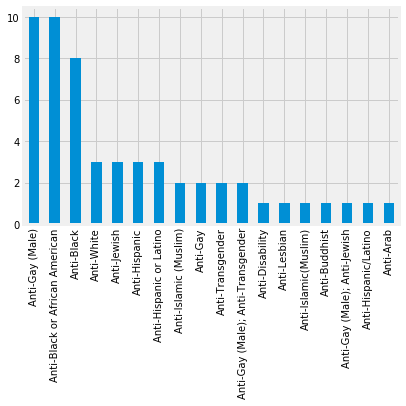

In [11]:
# Examining the 'bias' column
bias = aus_final.bias.value_counts()
display(bias)
print('----------------------------------')
# Displaying the bias values as proportions
display(aus_final.bias.value_counts(normalize=True))
bias.plot.bar()
plt.show()